In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive




In [ ]:
from sklearn import preprocessing
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,ShuffleSplit,cross_val_score,cross_validate,cross_val_predict,LeavePOut
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report,f1_score,roc_curve,precision_score,recall_score
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings('ignore')



In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/IDS DATASETS/gender-prediction.csv')
data

,height,weight,beard,hair_length,shoe_size,scarf,eye_color,gender
0,71,176,yes,short,44,no,black,male
1,68,165,no,bald,41,no,black,male
2,62,132,no,medium,37,yes,blue,female
3,65,138,no,long,38,no,gray,female
4,70,197,yes,medium,43,no,gray,male
...,...,...,...,...,...,...,...,...
75,65,99,no,short,39,yes,green,female
76,61,98,no,short,37,no,brown,female
77,67,119,yes,short,40,no,black,male
78,70,190,yes,medium,43,no,gray,male


# Q-1:-

In [ ]:
# class ratio (male vs female) in the dataset

a = data['gender']
fCount=0
mCount=0
for i in a:
  if(i=='female'):
    fCount +=1
  else:
    mCount+=1

mRatio = (mCount/(mCount+fCount))*100

fRatio = (fCount/(mCount+fCount))*100

print(round(mRatio,2))
print(fRatio)

57.5
42.5


# Q-2:-

In [ ]:
#encoding strings into numbers

labels = preprocessing.LabelEncoder()
b_encode = labels.fit_transform(data['beard'])
h_encode = labels.fit_transform(data['hair_length'])
s_encode = labels.fit_transform(data['scarf'])
e_encode = labels.fit_transform(data['eye_color'])

g_encode = labels.fit_transform(data['gender'])


In [ ]:
data['beard'] = b_encode
data['hair_length'] = h_encode
data['scarf'] = s_encode
data['eye_color'] = e_encode
data['gender'] = g_encode


In [ ]:
data

,height,weight,beard,hair_length,shoe_size,scarf,eye_color,gender
0,71,176,1,3,44,0,0,1
1,68,165,0,0,41,0,0,1
2,62,132,0,2,37,1,1,0
3,65,138,0,1,38,0,3,0
4,70,197,1,2,43,0,3,1
...,...,...,...,...,...,...,...,...
75,65,99,0,3,39,1,4,0
76,61,98,0,3,37,0,2,0
77,67,119,1,3,40,0,0,1
78,70,190,1,2,43,0,3,1


In [ ]:
X = data.drop(['gender'], axis=1)
y = data['gender']

In [ ]:
# Standard train/test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33, random_state=7)

# 80/20 train/test split
#X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20, random_state=7)


In [ ]:
# RANDOM FOREST

model = RandomForestClassifier()

model.fit(X_train, y_train)


prediction = model.predict(X_test)

accuracy = accuracy_score(y_test, prediction)*100

print(accuracy)

cm = metrics.confusion_matrix(y_test, prediction)
print("\n",cm)


100.0

 [[9 0]
 [0 7]]


In [ ]:
# Support Vector Machines

from sklearn.svm import SVC

svcModel = SVC(kernel = 'linear')
svcModel.fit(X_train, y_train)
pred = svcModel.predict(X_test)

svc_acc = (accuracy_score(y_test,pred))*100
print(svc_acc)

cm = metrics.confusion_matrix(y_test, pred)
print("\n", cm)

100.0

 [[9 0]
 [0 7]]


In [ ]:
# Multilayer Perceptron

from sklearn.neural_network import MLPClassifier

mpl = MLPClassifier(solver='lbfgs', random_state=5, learning_rate_init=0.01)
mpl.fit(X_train,y_train)
pred_mpl = mpl.predict(X_test)

acc = (accuracy_score(y_test, pred_mpl))*100
print(acc)

cm = metrics.confusion_matrix(y_test, pred_mpl)
print("\n", cm)

93.75

 [[9 0]
 [1 6]]


Feature Importance:


height         0.135617
weight         0.088450
beard          0.295695
hair_length    0.040078
shoe_size      0.223117
scarf          0.133774
eye_color      0.083269
dtype: float64 



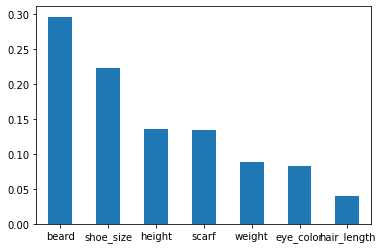

In [ ]:
# Name 2 attributes that you believe are the most “powerful” in the prediction task.

col = X.columns.values

fModel = ExtraTreesClassifier()
fModel.fit(X,y)

score = pd.DataFrame(columns = [col], data = [fModel.feature_importances_])

score = pd.Series(fModel.feature_importances_, index=X.columns)
score.nlargest(8).plot(kind='bar')

print("Feature Importance:\n\n")
print(score,"\n")
plt.xticks(rotation=360)
plt.show()


In [ ]:
# Try to exclude these 2 powerful attribute(s) from the dataset. Rerun the experiment (using 80/20 train/test split)

X1 = X.drop(['beard','shoe_size'], axis=1)

X_train2,X_test2,y_train2,y_test2=train_test_split(X1,y,test_size=0.20, random_state=16)


model2 = RandomForestClassifier()

model2.fit(X_train2, y_train2)


prediction = model2.predict(X_test2)

new_acc = accuracy_score(y_test2, prediction)*100

print(new_acc)

cm = metrics.confusion_matrix(y_test2, prediction)
print("\n", cm)


75.0

 [[3 1]
 [3 9]]


In [ ]:
# Support Vector Machines

from sklearn.svm import SVC

svcModel = SVC(kernel = 'linear')
svcModel.fit(X_train2, y_train2)
pred = svcModel.predict(X_test2)

svc_acc = (accuracy_score(y_test2,pred))*100
print(svc_acc)

cm = metrics.confusion_matrix(y_test2, pred)
print("\n", cm)

75.0

 [[3 1]
 [3 9]]


In [ ]:
# Multilayer Perceptron

from sklearn.neural_network import MLPClassifier

mpl = MLPClassifier(solver='lbfgs', random_state=4, learning_rate_init=0.01)
mpl.fit(X_train2,y_train2)
pred_mpl = mpl.predict(X_test2)

acc = (accuracy_score(y_test2, pred_mpl))*100
print(acc)

cm = metrics.confusion_matrix(y_test2, pred_mpl)
print("\n", cm)

75.0

 [[ 0  4]
 [ 0 12]]


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


## Q-3:-

In [ ]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
pred_dt = dt_model.predict(X_test)

(accuracy_score(y_test,pred_dt))*100

92.5925925925926

In [ ]:
#monte-carlo cross validation
shuffle_split=ShuffleSplit(test_size=0.33,n_splits=10)
scores=cross_val_score(dt_model,X,y,cv=shuffle_split,scoring='f1')

print("F1 Score: %.4f" %(scores.mean()))

F1 Score: 0.9566


In [ ]:
leave_val=LeavePOut(2)
leave_val.get_n_splits(X)

score2=cross_val_score(dt_model,X,y,cv=leave_val,scoring='f1')

print("F1 Score:%.4f" %(np.mean(score2)))

F1 Score:0.7777


# Q-4

In [ ]:
test_data = pd.read_csv('/content/drive/MyDrive/IDS DATASETS/new_data.csv')
test_data

,height,weight,beard,hair_length,shoe_size,scarf,eye_color,gender
0,75,171,yes,medium,43,0,black,male
1,65,133,no,long,40,1,brown,female
2,68,165,yes,short,43,0,brown,male
3,60,135,no,long,39,0,black,female
4,70,180,no,short,42,0,black,male


In [ ]:
#encoding strings into numbers

labels = preprocessing.LabelEncoder()
b_new = labels.fit_transform(test_data['beard'])
h_new = labels.fit_transform(test_data['hair_length'])
s_new = labels.fit_transform(test_data['scarf'])
e_new = labels.fit_transform(test_data['eye_color'])
g_new = labels.fit_transform(test_data['gender'])

test_data['beard'] = b_new
test_data['hair_length'] = h_new
test_data['scarf'] = s_new
test_data['eye_color'] = e_new
test_data['gender'] = g_new

test_data


,height,weight,beard,hair_length,shoe_size,scarf,eye_color,gender
0,75,171,1,1,43,0,0,1
1,65,133,0,0,40,1,1,0
2,68,165,1,2,43,0,1,1
3,60,135,0,0,39,0,0,0
4,70,180,0,2,42,0,0,1


In [ ]:
X_test_new = test_data.drop(['gender'], axis=1)
y_test_new = test_data['gender']

In [ ]:
# training the model on training set
gnb = GaussianNB()
gnb.fit(X, y)

# making predictions on the testing set
nb_pred = gnb.predict(X_test_new)
nb_acc = metrics.accuracy_score(y_test_new, nb_pred)*100

print("Naive Bayes model accuracy: ", round(nb_acc, 2), "%")


Naive Bayes model accuracy:  100.0 %


In [ ]:
model_cl_rep = metrics.classification_report(y_test_new, nb_pred)
print(model_cl_rep)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         3

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5

